In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from Learners import *
from econml.grf import RegressionForest
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from xgboost import XGBRegressor

from causalml.inference.meta import BaseXClassifier, BaseSClassifier, BaseTClassifier
#from causalml.inference.meta import XGBTRegressor, MLPTRegressor
#from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
#from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
#from causalml.propensity import ElasticNetPropensityModel

## Data

In [2]:
import pandas as pd
df=pd.read_csv('data.csv',index_col=False)
df.loc[df['sex']=='male', 'sex']=0
df.loc[df['sex']=='female', 'sex']=1
df['age']=2019-df['yob']
for item in ['g2000','g2002','p2000','p2002','p2004','voted']:
    df.loc[df[item]=='yes', item]=1
    df.loc[df[item]=='Yes', item]=1
    df.loc[df[item]=='no', item]=0
    df.loc[df[item]=='No', item]=0
df = df[(df['treatment']==' Control') | (df['treatment']==' Neighbors')]
df.loc[df['treatment']==' Control', 'treatment']=0
df.loc[df['treatment']==' Neighbors', 'treatment']=1
X=np.array(df[['sex','age','g2000','g2002','p2000','p2002','p2004']], dtype=np.int)
y=np.array(df['voted'],dtype=np.int)
treatment=np.array(df['treatment'],dtype=np.int)
print(X[treatment==1].shape,X[treatment==0].shape)

(38201, 7) (191243, 7)


In [ ]:
# T Learner
learner_t = BaseTClassifier(learner=RandomForestClassifier())
cate_t, lower_t, upper_t = learner_t.fit_predict(X=X, treatment=treatment, y=y,return_ci=True)

 36%|███▌      | 356/1000 [1:57:18<7:28:19, 41.77s/it]    

In [ ]:
# S Learner
learner_s = BaseSClassifier(learner=RandomForestClassifier())
cate_s, lower_s, upper_s = learner_s.fit_predict(X=X, treatment=treatment, y=y,return_ci=True)

  4%|▍         | 42/1000 [06:19<3:00:30, 11.31s/it]

In [3]:
# X Learner
learner_x = BaseXClassifier(outcome_learner=RandomForestClassifier(),effect_learner=RandomForestRegressor())
cate_x, lower_x, upper_x = learner_x.fit_predict(X=X, treatment=treatment, y=y,return_ci=True)

100%|██████████| 1000/1000 [11:52:50<00:00, 42.77s/it]    


In [24]:
df['group']=df['g2000']+df['g2002']+df['p2000']+df['p2002']+df['p2004']
df = df.reset_index()
g0idx = df.loc[df['group']==0].index
g1idx = df.loc[df['group']==1].index
g2idx = df.loc[df['group']==2].index
g3idx = df.loc[df['group']==3].index
g4idx = df.loc[df['group']==4].index
g5idx = df.loc[df['group']==5].index
len(g5idx)+len(g4idx)+len(g3idx)+len(g2idx)+len(g1idx)+len(g0idx)==len(X)

True

In [34]:
def plot_fig2(cate, lower, upper):
    #Find  the percentage of voters for which the predicted CATE is significantly positive
    pos = [len([ele for ele in lower[g0idx] if ele > 0]) / len(g0idx),
           len([ele for ele in lower[g1idx] if ele > 0]) / len(g1idx),
           len([ele for ele in lower[g2idx] if ele > 0]) / len(g2idx),
           len([ele for ele in lower[g3idx] if ele > 0]) / len(g3idx),
           len([ele for ele in lower[g4idx] if ele > 0]) / len(g4idx),
           len([ele for ele in lower[g5idx] if ele > 0]) / len(g5idx)]
    #Find  the percentage of voters for which the predicted CATE is significantly negative
    neg = [-len([ele for ele in upper[g0idx] if ele < 0]) / len(g0idx),
           -len([ele for ele in upper[g1idx] if ele < 0]) / len(g1idx),
           -len([ele for ele in upper[g2idx] if ele < 0]) / len(g2idx),
           -len([ele for ele in upper[g3idx] if ele < 0]) / len(g3idx),
           -len([ele for ele in upper[g4idx]if ele < 0]) / len(g4idx),
           -len([ele for ele in upper[g5idx] if ele < 0]) / len(g5idx)]
    #The width of each group is proportional to the size of the group
    sizes=[len(g0idx),len(g1idx),len(g2idx),len(g3idx),len(g4idx),len(g5idx)]
    fig, ax = plt.subplots(2)
    ax[0].set_ylabel('Voter Proportion')
    ax[1].set_ylabel('CATE')
    ax[1].set_xlabel('Cumulative Voting History')
    #ax[1].set_xticks(np.arange(6))
    ax[0].bar(np.arange(6),pos, width=sizes/np.sum(sizes)*2, color='b', bottom=[0,0,0,0,0,0])
    ax[0].bar(np.arange(6),neg, width=sizes/np.sum(sizes)*2, color='r')
    ax[1].boxplot(np.array([cate[g0idx],cate[g1idx],cate[g2idx],cate[g3idx],cate[g4idx],cate[g5idx]]),showfliers=False,widths=sizes/np.sum(sizes)*2)
    ax[0].axhline(y=0.0, color='black', linestyle='-')
    ax[1].axhline(y=0.0, color='black', linestyle='-')

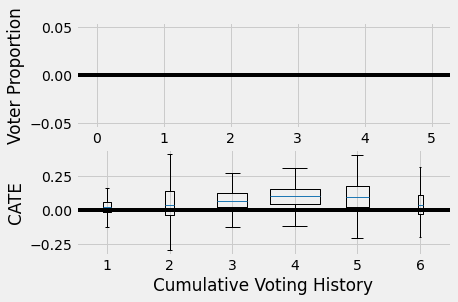

In [35]:
plot_fig2(cate_x, lower_x, upper_x)

In [32]:
high = cate_x[]

AttributeError: 'list' object has no attribute 'shape'

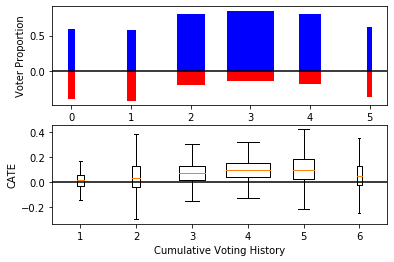

In [123]:
fig, ax = plt.subplots(2)
ax[0].set_ylabel('Voter Proportion')
ax[1].set_ylabel('CATE')
ax[1].set_xlabel('Cumulative Voting History')
#ax[1].set_xticks(np.arange(6))
ax[0].bar(np.arange(6),pos, width=sizes/np.sum(sizes)*2, color='b', bottom=[0,0,0,0,0,0])
ax[0].bar(np.arange(6),neg, width=sizes/np.sum(sizes)*2, color='r')
ax[1].boxplot([g0,g1,g2,g3,g4,g5],showfliers=False,widths=sizes/np.sum(sizes)*2)
ax[0].axhline(y=0.0, color='black', linestyle='-')
ax[1].axhline(y=0.0, color='black', linestyle='-')